# Python Training
Chapter 11

# `String Manipulation`

 Deal with free-form text, semi-structured text, categorical data, and data that should have another type.

In [1]:
import pandas as pd
# load File
url='https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
data_frame=pd.read_csv(url)

C:\Users\Loay\AppData\Local\Temp\ipykernel_16520\1463855737.py:4: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame=pd.read_csv(url)


In [2]:
data_frame.head(3)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [3]:
make=data_frame.make
s=pd.Series(['suz','jhon','fred','george'],index=[1,2,3,4])

In [4]:
# by default the type of series is object
make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

In [5]:
# You can convert it to a string type by using the .astype method
make.astype('string')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: string

### `The .str Accessor`
the .str accessor refers to a set of methods and properties that can be applied to string data within a pandas Series or DataFrame. 

In Python, the 'string' type typically refers to string literals, which are instances of the built-in str type. String literals are immutable, meaning their values cannot be changed after creation. These string literals are usually represented by the str class.

Usage
* series.panda_method ex pd.str.lower()
* 'Word'.lower()

List of .ste Accessor:
* lower
* capitalize
* find
* extract
* splittin

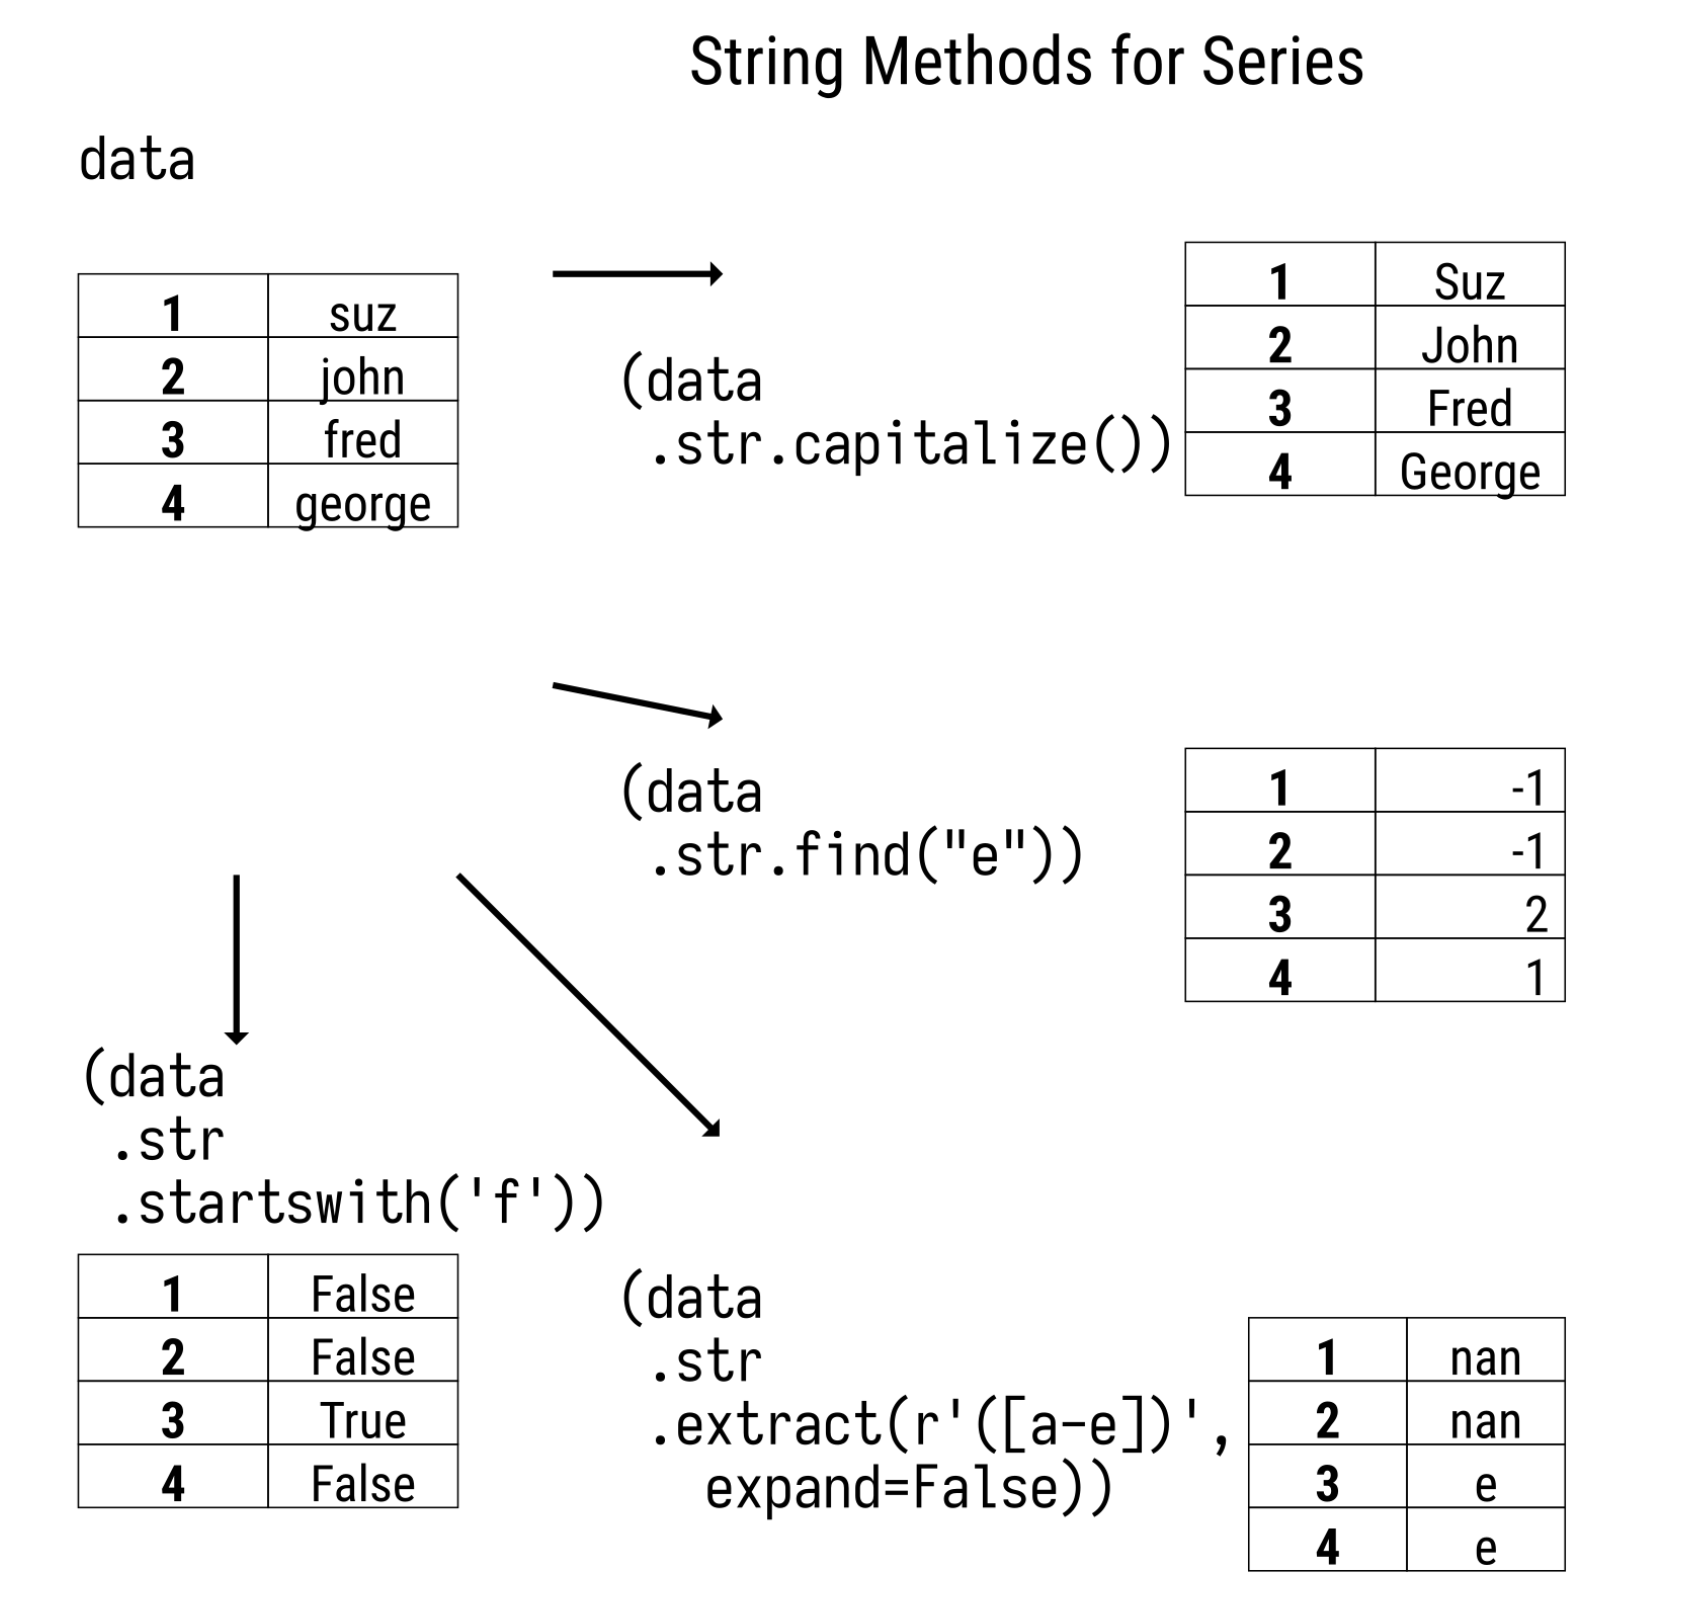

In [6]:
#'ahmad'.capitalize()
make.str.lower()

0        alfa romeo
1           ferrari
2             dodge
3             dodge
4            subaru
            ...    
41139        subaru
41140        subaru
41141        subaru
41142        subaru
41143        subaru
Name: make, Length: 41144, dtype: object

In [7]:
#'Hi'.find('i')
make.str.find('dodge')

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
41139   -1
41140   -1
41141   -1
41142   -1
41143   -1
Name: make, Length: 41144, dtype: int64

In [8]:
s.str.find('e')

1   -1
2   -1
3    2
4    1
dtype: int64

In [9]:
s.str.startswith('f')

1    False
2    False
3     True
4    False
dtype: bool

In [10]:
s.str.extract(r'([y:z])',expand=False)

1      z
2    NaN
3    NaN
4    NaN
dtype: object

In [11]:
# To find all of the non alphabetic characters (disregarding space)
# r: تشير إلى أن السلسلة التي تتبع هي raw string
# ([^a-zA-Z]): يعني ابحث عن أي حرف ليس من بين a و z (أو A و Z)، وضعه داخل قوسين يجعله
make.str.extract(r'([^a-z A-Z])')

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
41139,NaN
41140,NaN
41141,NaN
41142,NaN


In [12]:
# Splitting
age = pd . Series (['0-10','11-15','11-15','61-65','46-50'])
age

0     0-10
1    11-15
2    11-15
3    61-65
4    46-50
dtype: object

In [13]:
# call .split on the series, we get back a series that has lists in it.
# Having a series with a Python list makes it hard to manipulate the data.
# solution is to convert it to dataframe
age.str.split('-')

0     [0, 10]
1    [11, 15]
2    [11, 15]
3    [61, 65]
4    [46, 50]
dtype: object

In [14]:
age.str.split('-',expand=True).iloc[:,0].astype(int)

0     0
1    11
2    11
3    61
4    46
Name: 0, dtype: int32

In [15]:
# Replacing Text
make.str.replace('A','aa')

0        aalfa Romeo
1            Ferrari
2              Dodge
3              Dodge
4             Subaru
            ...     
41139         Subaru
41140         Subaru
41141         Subaru
41142         Subaru
41143         Subaru
Name: make, Length: 41144, dtype: object

In [16]:
#You can use a dictionary to specify complete replacements. 
make.replace({'Audi': 'Åudi','Acura':'Åcura','Ashton Martin':'Åshton Martin','Alfa Romeo':'Ålfa Romeo'})

0        Ålfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object


###  Optimizing .apply with Cython
##  IT DOES NOT WORK
Cython is a superset of Python that can compile to native code. To enable it in Jupyter, you will
need to run the following cell magic.

When you use %%cython in a Jupyter Notebook cell, it indicates that the content of the cell is written in Cython code. 

In [17]:
%load_ext Cython

In [18]:
%%cython
import random
cpdef int between_cy3(int x,int y):
    return random.randint(x,y)

DistutilsPlatformError: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/

# `Date and Time Manipulation`

Introduction:
* Pandas allows you to create series with date and time information in them.
* There is a standardized format, ISO 8601, for representing dates.
* The public domain timezone database from iana.org 
* General recommendation for programmers is to store dates in UTC times and then convert them to local time as needed.
* ISO 8601 supports offset but not timezone
* If you need local times I suggest you store one of these two options:
    * UTC date and timezone
    * Local date, offset, and timezone

Operations:
* Loading UTC Time Data
* Loading Local Time Data
* Convert Local time to UTC
* manipulating dates

Example:<br>
Nov 1, 2015 after 1:59 AM (MDT), the clock goes to 1:00 AM (MST). On that date there are two 1:30
AMs. One at MDT and another an hour later at MST, so two events occurred at 1:30 AM.<br>
There is 1:29 AM MDT, then after 1:59 AM MDT comes 1:00 AM MST, and there is another 1:29 AM for MST! <br>

### `1- Loading UTC Time Data`
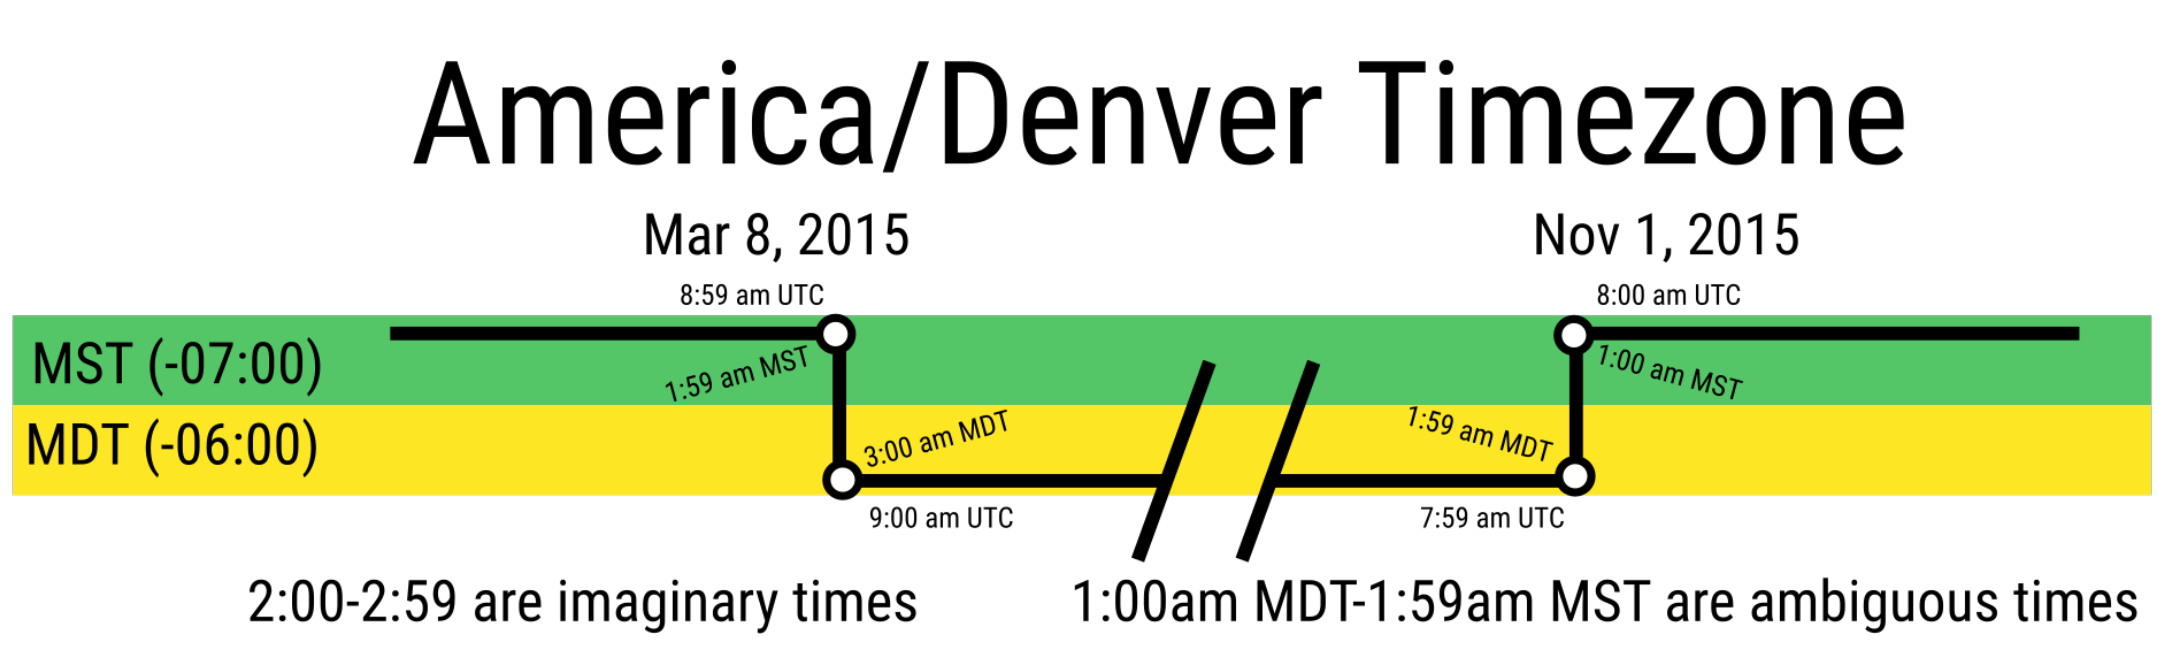

In [24]:
col = pd . Series ([ '2015-03-08 08:00:00+00:00 ' ,
... '2015-03-08 08:30:00+00:00' ,
... '2015-03-08 09:00:00+00:00' ,
... '2015-03-08 09:30:00+00:00' ,
... '2015-11-01 06:30:00+00:00' ,
... '2015-11-01 07:00:00+00:00' ,
... '2015-11-01 07:30:00+00:00' ,
... '2015-11-01 08:00:00+00:00' ,
... '2015-11-01 08:30:00+00:00' ,
... '2015-11-01 08:00:00+00:00' ,
... '2015-11-01 08:30:00+00:00' ,
... '2015-11-01 09:00:00+00:00' ,
... '2015-11-01 09:30:00+00:00' ,
... '2015-11-01 10:00:00+00:00'])

col_s=pd.to_datetime(col,utc=True)

In [25]:
# UTC dates series
col_s

0    2015-03-08 08:00:00+00:00
1    2015-03-08 08:30:00+00:00
2    2015-03-08 09:00:00+00:00
3    2015-03-08 09:30:00+00:00
4    2015-11-01 06:30:00+00:00
5    2015-11-01 07:00:00+00:00
6    2015-11-01 07:30:00+00:00
7    2015-11-01 08:00:00+00:00
8    2015-11-01 08:30:00+00:00
9    2015-11-01 08:00:00+00:00
10   2015-11-01 08:30:00+00:00
11   2015-11-01 09:00:00+00:00
12   2015-11-01 09:30:00+00:00
13   2015-11-01 10:00:00+00:00
dtype: datetime64[ns, UTC]

In [23]:
# America/Denver dates series after converting UTC dates to America/Denver dates

# you have the ability to leverage the .dt attribute.

col_s.dt.tz_convert('America/Denver')

0    2015-03-08 01:00:00-07:00
1    2015-03-08 01:30:00-07:00
2    2015-03-08 03:00:00-06:00
3    2015-03-08 03:30:00-06:00
4    2015-11-01 00:30:00-06:00
5    2015-11-01 01:00:00-06:00
6    2015-11-01 01:30:00-06:00
7    2015-11-01 01:00:00-07:00
8    2015-11-01 01:30:00-07:00
9    2015-11-01 01:00:00-07:00
10   2015-11-01 01:30:00-07:00
11   2015-11-01 02:00:00-07:00
12   2015-11-01 02:30:00-07:00
13   2015-11-01 03:00:00-07:00
dtype: datetime64[ns, America/Denver]

In [48]:
 s = pd . Series ([ '2015 -03 -08 01:00:00 -07:00 ' ,
... '2015 -03 -08 01:30:00 -07:00 ' ,
... '2015 -03 -08 03:00:00 -06:00 ' ,
... '2015 -03 -08 03:30:00 -06:00 ' ,
... '2015 -11 -01 00:30:00 -06:00 ' ,
... '2015 -11 -01 01:00:00 -06:00 ' ,
... '2015 -11 -01 01:30:00 -06:00 ' ,
... '2015 -11 -01 01:00:00 -07:00 ' ,
... '2015 -11 -01 01:30:00 -07:00 ' ,
... '2015 -11 -01 01:00:00 -07:00 ' ,
... '2015 -11 -01 01:30:00 -07:00 ' ,
... '2015 -11 -01 02:00:00 -07:00 ' ,
... '2015 -11 -01 02:30:00 -07:00 ' ,
... '2015 -11 -01 03:00:00 -07:00 '])

In [29]:
#here we identify the offset with UTC format, 
#so the result is object but the when we use dt.tz_convert('America/Denver') we will get the same results
s

0     2015 -03 -08 01:00:00 -07:00 
1     2015 -03 -08 01:30:00 -07:00 
2     2015 -03 -08 03:00:00 -06:00 
3     2015 -03 -08 03:30:00 -06:00 
4     2015 -11 -01 00:30:00 -06:00 
5     2015 -11 -01 01:00:00 -06:00 
6     2015 -11 -01 01:30:00 -06:00 
7     2015 -11 -01 01:00:00 -07:00 
8     2015 -11 -01 01:30:00 -07:00 
9     2015 -11 -01 01:00:00 -07:00 
10    2015 -11 -01 01:30:00 -07:00 
11    2015 -11 -01 02:00:00 -07:00 
12    2015 -11 -01 02:30:00 -07:00 
13    2015 -11 -01 03:00:00 -07:00 
dtype: object

In [30]:
pd.to_datetime(s,utc=True).dt.tz_convert('America/Denver')

0    2015-03-08 01:00:00-07:00
1    2015-03-08 01:30:00-07:00
2    2015-03-08 03:00:00-06:00
3    2015-03-08 03:30:00-06:00
4    2015-11-01 00:30:00-06:00
5    2015-11-01 01:00:00-06:00
6    2015-11-01 01:30:00-06:00
7    2015-11-01 01:00:00-07:00
8    2015-11-01 01:30:00-07:00
9    2015-11-01 01:00:00-07:00
10   2015-11-01 01:30:00-07:00
11   2015-11-01 02:00:00-07:00
12   2015-11-01 02:30:00-07:00
13   2015-11-01 03:00:00-07:00
dtype: datetime64[ns, America/Denver]

### `2- Loading Local Time Data`

In [55]:
# we need to have the date, the offset, and the timezone
>>> time = pd . Series ([ '2015-03-08 01:00:00' ,
... '2015-03-08 01:30:00' ,
... '2015-03-08 02:00:00' ,
... '2015-03-08 02:30:00' ,
... '2015-03-08 03:00:00' ,
... '2015-03-08 02:00:00' ,
... '2015-03-08 02:30:00' ,
... '2015-03-08 03:00:00' ,
... '2015-03-08 03:30:00' ,
... '2015-11-01 00:30:00' ,
... '2015-11-01 01:00:00' ,
... '2015-11-01 01:30:00' ,
... '2015-11-01 02:00:00' ,
... '2015-11-01 02:30:00' ,
... '2015-11-01 01:00:00' ,
... '2015-11-01 01:30:00' ,
... '2015-11-01 02:00:00' ,
... '2015-11-01 02:30:00' ,
... '2015-11-01 03:00:00'])

In [56]:
time

0     2015-03-08 01:00:00
1     2015-03-08 01:30:00
2     2015-03-08 02:00:00
3     2015-03-08 02:30:00
4     2015-03-08 03:00:00
5     2015-03-08 02:00:00
6     2015-03-08 02:30:00
7     2015-03-08 03:00:00
8     2015-03-08 03:30:00
9     2015-11-01 00:30:00
10    2015-11-01 01:00:00
11    2015-11-01 01:30:00
12    2015-11-01 02:00:00
13    2015-11-01 02:30:00
14    2015-11-01 01:00:00
15    2015-11-01 01:30:00
16    2015-11-01 02:00:00
17    2015-11-01 02:30:00
18    2015-11-01 03:00:00
dtype: object

In [90]:
>>> offset = pd . Series ([ -7 , -7 , -7 , -7 , -7 , -6 , -6 ,
... -6 , -6 , -6 , -6 , -6 , -6 , -6 , -7 , -7 , -7 , -7 , -7])

In [91]:
offset

0    -7
1    -7
2    -7
3    -7
4    -7
5    -6
6    -6
7    -6
8    -6
9    -6
10   -6
11   -6
12   -6
13   -6
14   -7
15   -7
16   -7
17   -7
18   -7
dtype: int64

In [84]:
( pd.to_datetime(time)
... .groupby(offset)
... .transform(lambda ss : ss.dt.tz_localize(ss.name)
... .dt.tz_convert('America/Denver'))
)

0    2015-03-07 18:00:07-07:00
1    2015-03-07 18:30:07-07:00
2    2015-03-07 19:00:07-07:00
3    2015-03-07 19:30:07-07:00
4    2015-03-07 20:00:07-07:00
5    2015-03-07 19:00:06-07:00
6    2015-03-07 19:30:06-07:00
7    2015-03-07 20:00:06-07:00
8    2015-03-07 20:30:06-07:00
9    2015-10-31 18:30:06-06:00
10   2015-10-31 19:00:06-06:00
11   2015-10-31 19:30:06-06:00
12   2015-10-31 20:00:06-06:00
13   2015-10-31 20:30:06-06:00
14   2015-10-31 19:00:07-06:00
15   2015-10-31 19:30:07-06:00
16   2015-10-31 20:00:07-06:00
17   2015-10-31 20:30:07-06:00
18   2015-10-31 21:00:07-06:00
dtype: datetime64[ns, America/Denver]

In [93]:
offset=offset.replace({-7:'-07:00',-6:'-06:00'})

In [94]:
offset

0     -07:00
1     -07:00
2     -07:00
3     -07:00
4     -07:00
5     -06:00
6     -06:00
7     -06:00
8     -06:00
9     -06:00
10    -06:00
11    -06:00
12    -06:00
13    -06:00
14    -07:00
15    -07:00
16    -07:00
17    -07:00
18    -07:00
dtype: object

In [86]:
local=(pd.to_datetime(time)
... .groupby(offset)
... .transform (lambda ss : ss.dt.tz_localize(ss.name)
... .dt.tz_convert('America/Denver'))
)

In [100]:
local

0    2015-03-08 01:00:00-07:00
1    2015-03-08 01:30:00-07:00
2    2015-03-08 03:00:00-06:00
3    2015-03-08 03:30:00-06:00
4    2015-03-08 04:00:00-06:00
5    2015-03-08 01:00:00-07:00
6    2015-03-08 01:30:00-07:00
7    2015-03-08 03:00:00-06:00
8    2015-03-08 03:30:00-06:00
9    2015-11-01 00:30:00-06:00
10   2015-11-01 01:00:00-06:00
11   2015-11-01 01:30:00-06:00
12   2015-11-01 01:00:00-07:00
13   2015-11-01 01:30:00-07:00
14   2015-11-01 01:00:00-07:00
15   2015-11-01 01:30:00-07:00
16   2015-11-01 02:00:00-07:00
17   2015-11-01 02:30:00-07:00
18   2015-11-01 03:00:00-07:00
dtype: datetime64[ns, America/Denver]

### `3- Converting Local time to UTC`


In [96]:
local.dt.tz_convert('UTC')

0    2015-03-08 08:00:00+00:00
1    2015-03-08 08:30:00+00:00
2    2015-03-08 09:00:00+00:00
3    2015-03-08 09:30:00+00:00
4    2015-03-08 10:00:00+00:00
5    2015-03-08 08:00:00+00:00
6    2015-03-08 08:30:00+00:00
7    2015-03-08 09:00:00+00:00
8    2015-03-08 09:30:00+00:00
9    2015-11-01 06:30:00+00:00
10   2015-11-01 07:00:00+00:00
11   2015-11-01 07:30:00+00:00
12   2015-11-01 08:00:00+00:00
13   2015-11-01 08:30:00+00:00
14   2015-11-01 08:00:00+00:00
15   2015-11-01 08:30:00+00:00
16   2015-11-01 09:00:00+00:00
17   2015-11-01 09:30:00+00:00
18   2015-11-01 10:00:00+00:00
dtype: datetime64[ns, UTC]

 ## `4- Manipulating Dates`
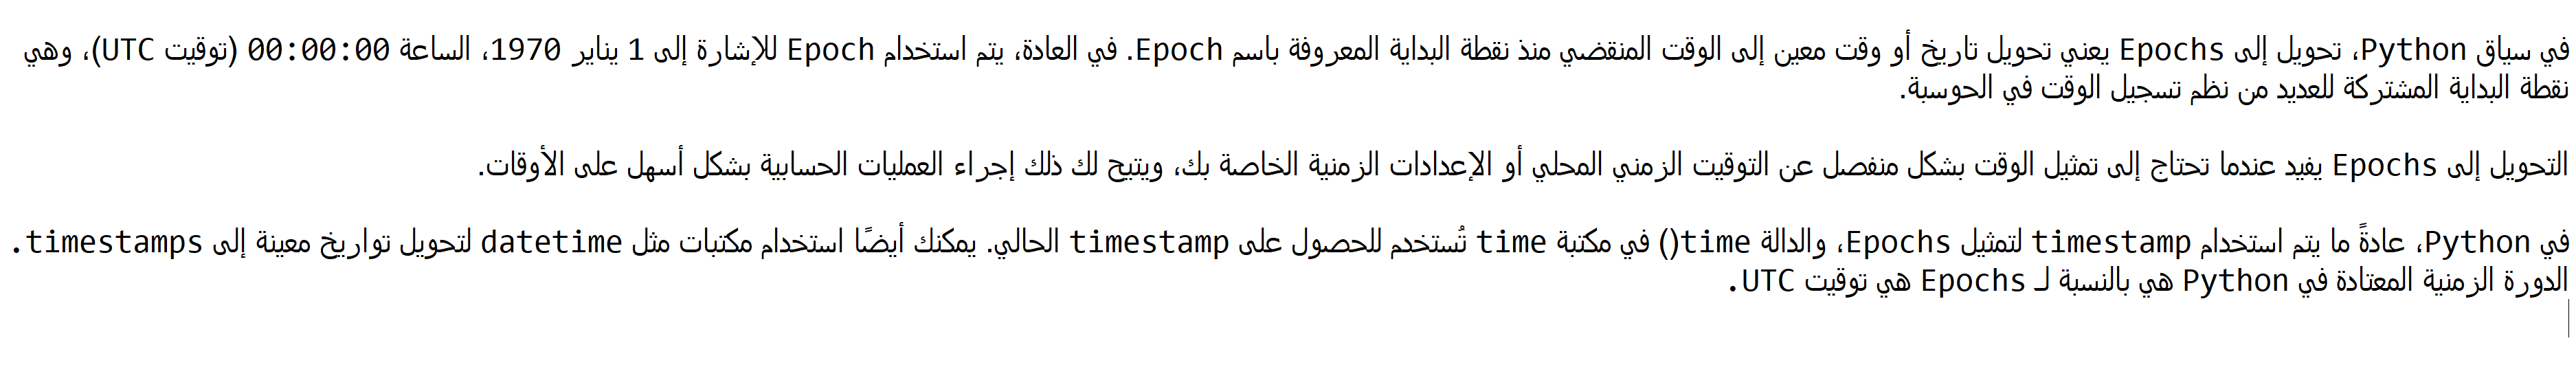

In [106]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv'

In [107]:
alta_df=pd.read_csv(url)

In [109]:
alta_df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
alta_df.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'DASF', 'MDPR', 'MDSF', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'WT01', 'WT03', 'WT04', 'WT05', 'WT06', 'WT11'],
      dtype='object')

In [113]:
# s. It adds a .dt attribute to the series that allows us to perform various date manipulations.
dates=pd.to_datetime(alta_df.DATE)

In [112]:
dates

0       1980-01-01
1       1980-01-02
2       1980-01-03
3       1980-01-04
4       1980-01-05
           ...    
14155   2019-09-03
14156   2019-09-04
14157   2019-09-05
14158   2019-09-06
14159   2019-09-07
Name: DATE, Length: 14160, dtype: datetime64[ns]

In [127]:
# To get the weekdays in Spanish
dates.dt.day_name()

0          Tuesday
1        Wednesday
2         Thursday
3           Friday
4         Saturday
           ...    
14155      Tuesday
14156    Wednesday
14157     Thursday
14158       Friday
14159     Saturday
Name: DATE, Length: 14160, dtype: object

In [129]:
dates.dt.is_month_end

0        False
1        False
2        False
3        False
4        False
         ...  
14155    False
14156    False
14157    False
14158    False
14159    False
Name: DATE, Length: 14160, dtype: bool

In [131]:
# format the date as a string:
dates.dt.strftime('%d/%m/%y')

0        01/01/80
1        02/01/80
2        03/01/80
3        04/01/80
4        05/01/80
           ...   
14155    03/09/19
14156    04/09/19
14157    05/09/19
14158    06/09/19
14159    07/09/19
Name: DATE, Length: 14160, dtype: object

## `Dates in the Index`

In [135]:
# Way 1
snow=alta_df.SNOW

In [137]:
snow=snow.rename(dates)

In [138]:
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [141]:
# Way 2 - chaining
snow=(alta_df
       .SNOW
       .rename(dates)
      )

In [144]:
# Finding Missing Data
# عل يوجد قيمة واحدة على الاقل تحوي NULL
snow.isna().any()

True

In [147]:
snow[snow.isna()]

1985-07-30   NaN
1985-09-12   NaN
1985-09-19   NaN
1986-02-07   NaN
1986-06-26   NaN
              ..
2017-04-26   NaN
2017-09-20   NaN
2017-10-02   NaN
2017-12-23   NaN
2018-12-03   NaN
Name: SNOW, Length: 365, dtype: float64

In [148]:
snow.loc['1985-09':'1985-09-20']

1985-09-01    0.0
1985-09-02    0.0
1985-09-03    0.0
1985-09-04    0.0
1985-09-05    0.0
1985-09-06    0.0
1985-09-07    0.0
1985-09-08    0.0
1985-09-09    0.0
1985-09-10    0.0
1985-09-11    0.0
1985-09-12    NaN
1985-09-13    0.0
1985-09-14    0.0
1985-09-15    0.0
1985-09-16    0.0
1985-09-17    0.0
1985-09-18    0.0
1985-09-19    NaN
1985-09-20    0.0
Name: SNOW, dtype: float64

In [154]:
#Filling In Missing Data
snow.loc['1985-09':'1985-09-20'].fillna(0)

1985-09-01    0.0
1985-09-02    0.0
1985-09-03    0.0
1985-09-04    0.0
1985-09-05    0.0
1985-09-06    0.0
1985-09-07    0.0
1985-09-08    0.0
1985-09-09    0.0
1985-09-10    0.0
1985-09-11    0.0
1985-09-12    0.0
1985-09-13    0.0
1985-09-14    0.0
1985-09-15    0.0
1985-09-16    0.0
1985-09-17    0.0
1985-09-18    0.0
1985-09-19    0.0
1985-09-20    0.0
Name: SNOW, dtype: float64

In [155]:
(snow
 .loc['1985-09':'1985-09-20']
 .fillna(0)
)

1985-09-01    0.0
1985-09-02    0.0
1985-09-03    0.0
1985-09-04    0.0
1985-09-05    0.0
1985-09-06    0.0
1985-09-07    0.0
1985-09-08    0.0
1985-09-09    0.0
1985-09-10    0.0
1985-09-11    0.0
1985-09-12    0.0
1985-09-13    0.0
1985-09-14    0.0
1985-09-15    0.0
1985-09-16    0.0
1985-09-17    0.0
1985-09-18    0.0
1985-09-19    0.0
1985-09-20    0.0
Name: SNOW, dtype: float64

In [160]:
# a forward fill or back fill using .ffill and .bfill,It is not clear to me why these values are missing. 
# Did a sensor fail? Did someone forget to write down the amount? Was it really zero?

snow.loc['1987-12-30': '1988-01-10']

1987-12-30    6.0
1987-12-31    5.0
1988-01-01    NaN
1988-01-02    0.0
1988-01-03    0.0
1988-01-04    NaN
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

In [162]:
(snow
 .loc['1987-12-30': '1988-01-10']
 .bfill()
)

1987-12-30    6.0
1987-12-31    5.0
1988-01-01    0.0
1988-01-02    0.0
1988-01-03    0.0
1988-01-04    2.0
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

In [163]:
(snow
 .loc['1987-12-30': '1988-01-10']
 .interpolate()
)

1987-12-30    6.0
1987-12-31    5.0
1988-01-01    2.5
1988-01-02    0.0
1988-01-03    0.0
1988-01-04    1.0
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

In [165]:
# Dropping Missing Values
snow.loc['1987-12-30': '1988-01-10'].dropna()

1987-12-30    6.0
1987-12-31    5.0
1988-01-02    0.0
1988-01-03    0.0
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

In [166]:
# shifting we want to compare to the previous or subsequent entry
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [168]:
snow.shift(-1)

1980-01-01    3.0
1980-01-02    1.0
1980-01-03    0.0
1980-01-04    0.0
1980-01-05    1.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    NaN
Name: SNOW, Length: 14160, dtype: float64

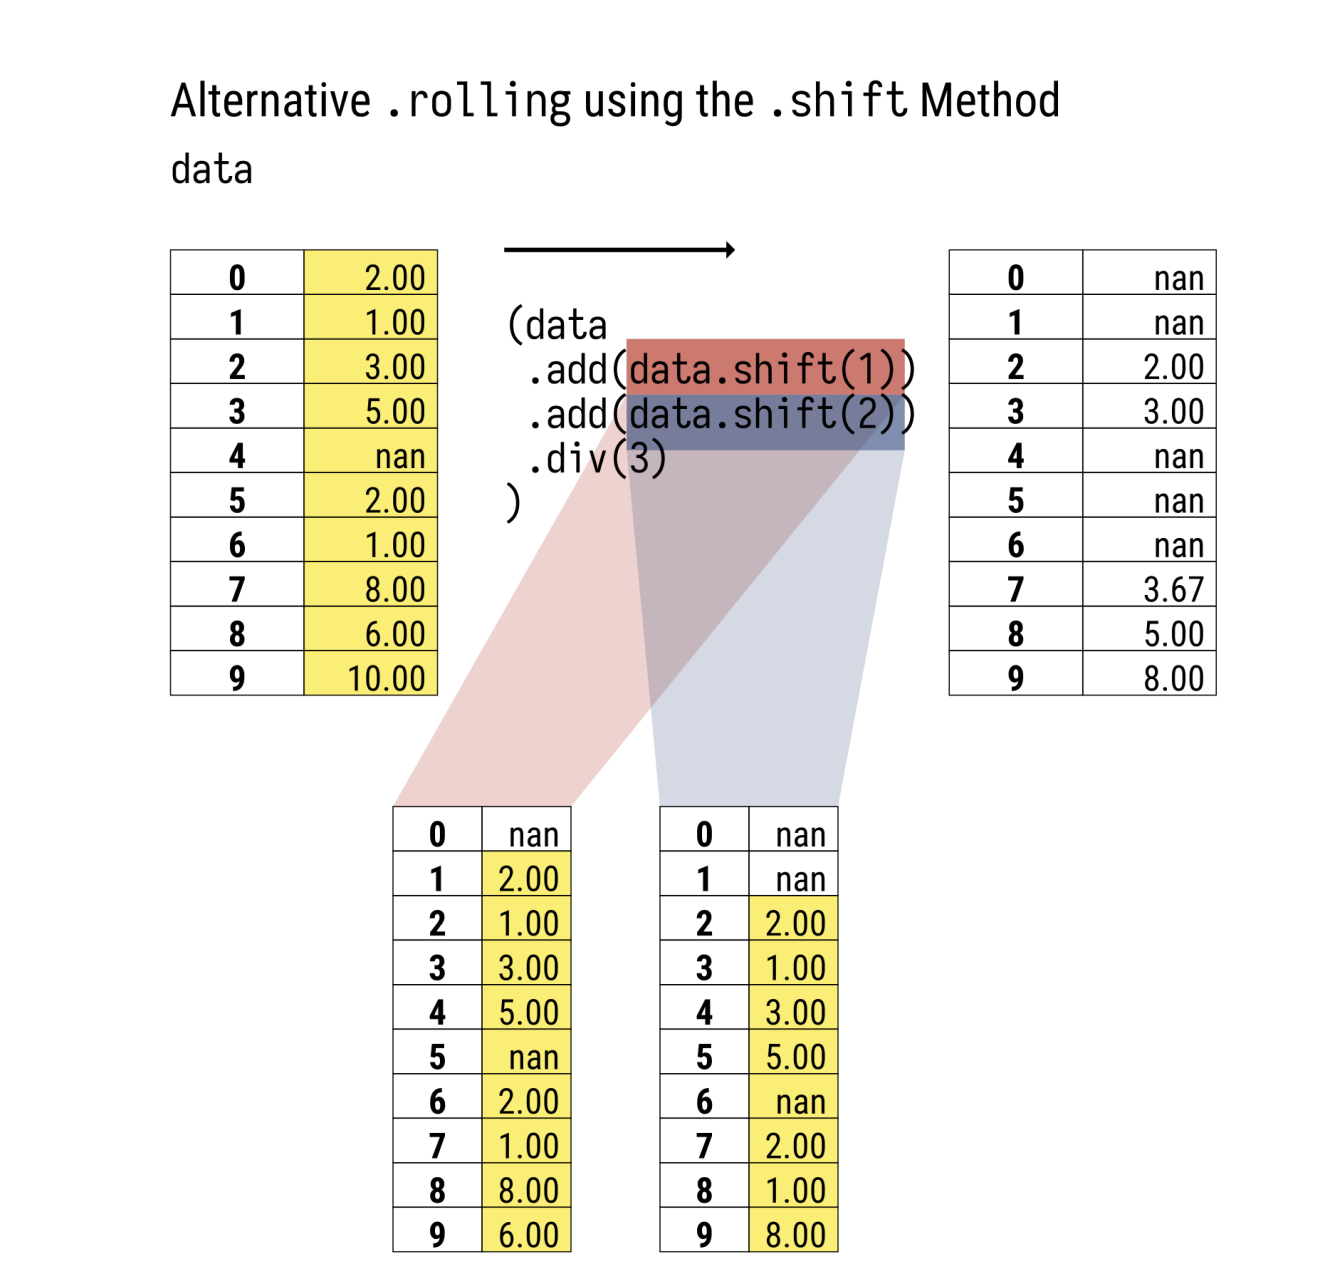

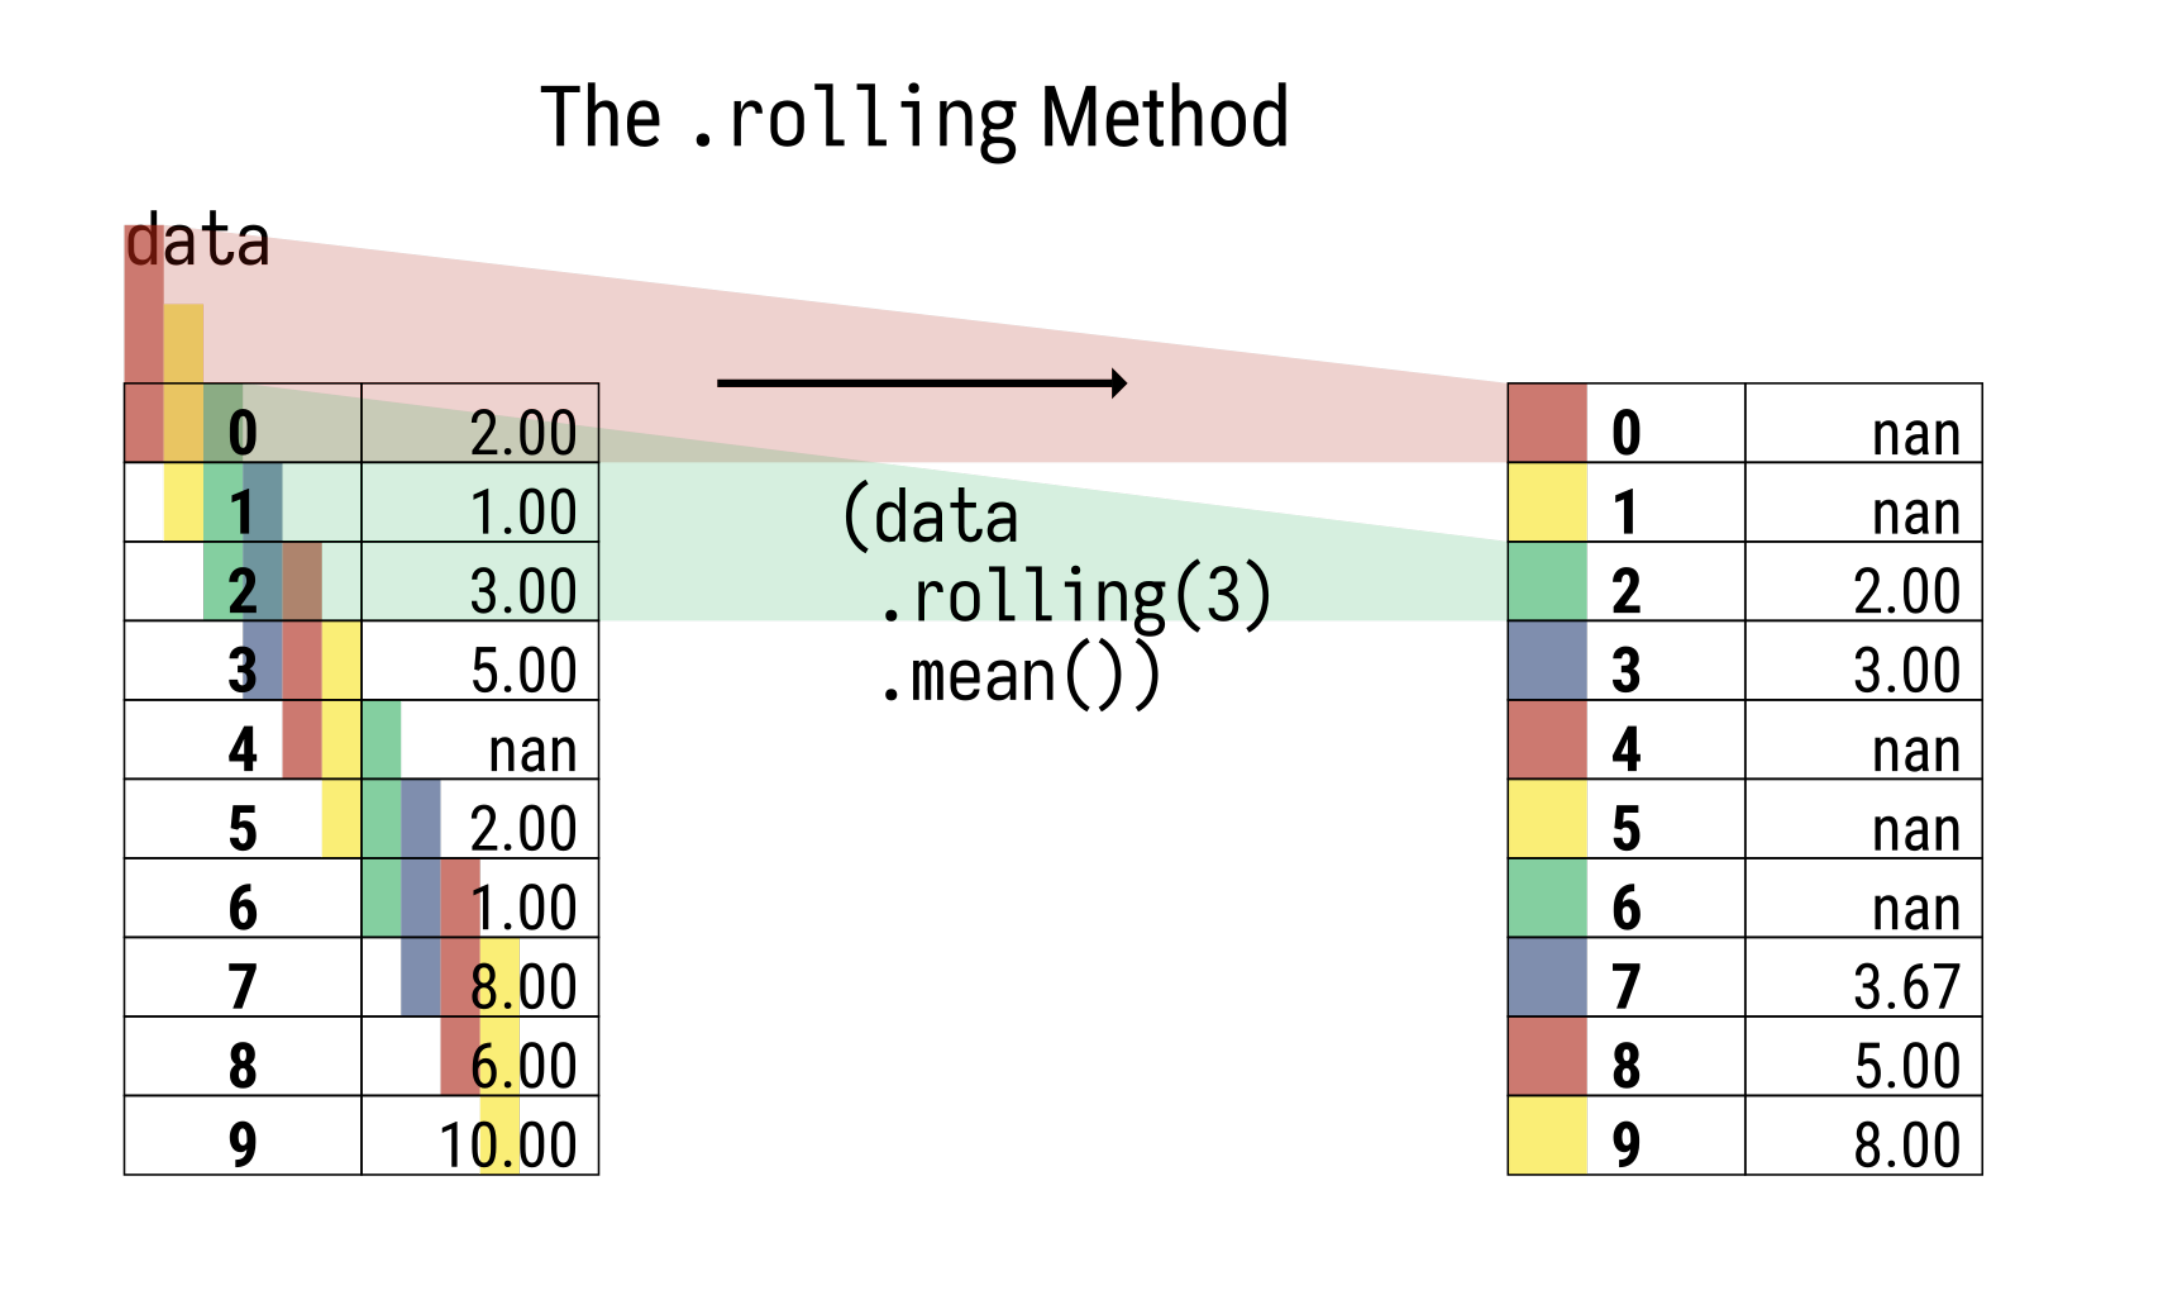


In [172]:
# Rolling Average: To calculate the five day moving average, we can leverage .shift and do the following
# you will notice that That was a little tedious to write.b
(snow
 .add(snow.shift(1))
 .add(snow.shift(2))
 .add(snow.shift(3))
 .add(snow.shift(4))
 .div(5)
)

1980-01-01    NaN
1980-01-02    NaN
1980-01-03    NaN
1980-01-04    NaN
1980-01-05    1.2
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [176]:
snow.rolling(5).mean()

1980-01-01    NaN
1980-01-02    NaN
1980-01-03    NaN
1980-01-04    NaN
1980-01-05    1.2
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [179]:
# Resampling : we group date entries by some interval (yearly, monthly, weekly) and then aggregate the values at that interval.
snow.resample('M').max()

1980-01-31    20.0
1980-02-29    25.0
1980-03-31    16.0
1980-04-30    10.0
1980-05-31     9.0
              ... 
2019-05-31     5.1
2019-06-30     0.0
2019-07-31     0.0
2019-08-31     0.0
2019-09-30     0.0
Freq: M, Name: SNOW, Length: 477, dtype: float64

In [181]:
# we want an annual grouping ('A'), but ending in May of each year:
# we want to aggregate the maximum value for each ski season
snow.resample('A-MAY').max()


1980-05-31    25.0
1981-05-31    26.0
1982-05-31    34.0
1983-05-31    38.0
1984-05-31    25.0
1985-05-31    22.0
1986-05-31    34.0
1987-05-31    16.0
1988-05-31    23.0
1989-05-31    30.0
1990-05-31    32.0
1991-05-31    28.0
1992-05-31    22.0
1993-05-31    30.0
1994-05-31    36.0
1995-05-31    25.0
1996-05-31    34.0
1997-05-31    22.0
1998-05-31    29.0
1999-05-31    26.0
2000-05-31    23.0
2001-05-31    19.0
2002-05-31    28.0
2003-05-31    14.0
2004-05-31    24.0
2005-05-31    31.0
2006-05-31    27.0
2007-05-31    15.0
2008-05-31    21.0
2009-05-31    23.0
2010-05-31    32.0
2011-05-31    22.0
2012-05-31    18.0
2013-05-31    19.0
2014-05-31    11.0
2015-05-31    25.0
2016-05-31    15.0
2017-05-31    26.0
2018-05-31    21.8
2019-05-31    20.7
2020-05-31     0.0
Freq: A-MAY, Name: SNOW, dtype: float64

In [ ]:
#  Gathering Aggregate Values (But Keeping Index)